In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/final_output.csv')

In [3]:
df.describe()

,Latitude,Longitude,Feature_1,Feature_3,Feature_8,Feature_18,Feature_27,Feature_28,Feature_31,Feature_35,...,hospitals_1,hospitals_2,hospitals_3,school_1,school_2,school_3,restaurant_1,restaurant_2,restaurant_3,Closest_NTL
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4497.000000
mean,29.339154,76.687366,0.000677,0.071368,0.015955,0.496802,0.031878,0.000086,0.001315,0.006411,...,6.679088,9.214127,10.719264,19.126971,24.945345,31.441974,16.445141,21.766880,25.120127,88.729153
std,0.869346,0.585965,0.009612,0.146439,0.053754,0.460610,0.088518,0.001538,0.014194,0.034234,...,3.636810,4.273836,4.825548,12.423253,12.874071,15.164264,11.485260,13.196421,14.279802,84.819733
min,27.729250,74.547000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031268,0.203532,0.203532,0.115340,2.329952,3.093729,0.132564,0.394199,0.394199,7.000000
25%,28.511159,76.428625,0.000000,0.000000,0.000000,0.176153,0.000000,0.000000,0.000000,0.000000,...,3.892504,6.113899,7.086589,9.997603,15.623440,19.756825,7.711796,12.288639,14.899818,25.000000
50%,29.435002,76.840500,0.000000,0.000000,0.000000,0.382912,0.000000,0.000000,0.000000,0.000000,...,6.388946,9.429240,11.234334,16.772891,22.376469,28.318681,14.447216,19.666029,23.751148,43.000000
75%,30.097066,77.095929,0.000000,0.026883,0.000000,0.681840,0.000000,0.000000,0.000000,0.000000,...,9.286375,12.342217,14.465019,24.821402,33.084444,42.773855,22.737973,27.646301,32.289575,149.000000
max,30.913515,77.533710,0.150657,0.766327,0.608131,2.320614,0.793441,0.032959,0.257145,0.427289,...,22.814318,23.071465,23.282265,61.455376,67.616075,79.698706,68.031473,73.130936,85.866495,255.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 624 entries, Image to Closest_NTL
dtypes: float64(621), object(3)
memory usage: 21.4+ MB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
columns_to_drop = ['Latitude','Longitude','Image Name','Predicted Class','Image']
df = df.drop(columns=columns_to_drop)
df.fillna(0, inplace=True)

In [7]:
df.columns

Index(['Feature_1', 'Feature_3', 'Feature_8', 'Feature_18', 'Feature_27',
       'Feature_28', 'Feature_31', 'Feature_35', 'Feature_43', 'Feature_46',
       ...
       'hospitals_1', 'hospitals_2', 'hospitals_3', 'school_1', 'school_2',
       'school_3', 'restaurant_1', 'restaurant_2', 'restaurant_3',
       'Closest_NTL'],
      dtype='object', length=619)

In [8]:
target_column = 'Closest_NTL'

In [9]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_predict = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
r2_lr = r2_score(y_test, y_lr_predict)
print(f'R2 Score: {r2_lr}')
mae_lr = mean_absolute_error(y_test, y_lr_predict)
print(f'Mean Absolute Error (MAE): {mae_lr}')

R2 Score: 0.7059672935012262
Mean Absolute Error (MAE): 30.881371919157107


In [12]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_rfc_predict = rfc.predict(X_test)

r2_rfc = r2_score(y_test, y_rfc_predict)
print(f'R2 Score: {r2_rfc}')
mae_rfc = mean_absolute_error(y_test, y_rfc_predict)
print(f'Mean Absolute Error (MAE): {mae_rfc}')

R2 Score: 0.8843008600276574
Mean Absolute Error (MAE): 13.706477777777778


In [13]:
from sklearn.linear_model import LassoCV

alphas = [10**-25,0.001, 0.01, 0.1, 1.0, 10.0]  # List of alpha values to test
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model to your training data
lasso_cv.fit(X_train, y_train)

# Find the best alpha value using cross-validation
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Make predictions on the test data using the best alpha
y_lasoo_pred = lasso_cv.predict(X_test)

# Evaluate the model
r2_lasoo = r2_score(y_test, y_lasoo_pred)
print(f'R2 Score: {r2_lasoo}')
mae_lasoo = mean_absolute_error(y_test, y_lasoo_pred)
print(f'Mean Absolute Error (MAE): {mae_lasoo}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333822.00482963584, tolerance: 2089.2855631944435
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3545303.3654277353, tolerance: 2089.2855631944435
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3276936.9124730146, tolerance: 2089.2855631944435
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Converge

Best alpha: 1e-25
R2 Score: 0.6569408666171535
Mean Absolute Error (MAE): 35.769656788815944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.914e+06, tolerance: 2.617e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model2 = Ridge()
alphas = [10**-25,0.1,0.5,5,6,8,10**1,10**2,10**3,10**4]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(model2, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)
rid = Ridge(alpha=best_alpha)
rid.fit(X_train, y_train)
y_rid_predict = rid.predict(X_test)
r2_rid = r2_score(y_test, y_rid_predict)
print(f'R2 Score: {r2_rid}')
mae_rid = mean_absolute_error(y_test, y_rid_predict)
print(f'Mean Absolute Error (MAE): {mae_rid}')

1e-25
R2 Score: 0.7058518854436946
Mean Absolute Error (MAE): 31.12363658203252


In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid for SVR hyperparameters
#param_grid_svr = {
 #   'kernel': ['linear', 'rbf'],  # Kernel types to test
  #'C': [0.1, 1.0, 10.0],       # Regularization parameter
 #   'epsilon': [0.01, 0.1, 1.0]  # Epsilon parameter
#}

# Create an SVR model
#svr = SVR()

# Perform hyperparameter optimization using GridSearchCV
#grid_search_svr = GridSearchCV(svr, param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5)
#grid_search_svr.fit(X_train, y_train)

# Get the best hyperparameters
#best_params_svr = grid_search_svr.best_params_
#print("Best Hyperparameters:")
#print(f"Kernel: {best_params_svr['kernel']}")
#print(f"C: {best_params_svr['C']}")
#print(f"Epsilon: {best_params_svr['epsilon']}")

# Make predictions on the test data using the best model
#y_svr_pred = grid_search_svr.predict(X_test)

#r2_svr = r2_score(y_test, y_svr_predict)
#print(f'R2 Score: {r2_svr}')
#mae_svr = mean_absolute_error(y_test, y_svr_predict)
#print(f'Mean Absolute Error (MAE): {mae_svr}')


In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV, KFold



# Define the kernel to optimize
#kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create the Gaussian Process Regressor model
#gpr = GaussianProcessRegressor(kernel=kernel)

# Define the hyperparameter grid to search over
#param_dist = {
  #  "kernel__k1__constant_value": [0.1, 1.0],
 #   "kernel__k2__length_scale": [0.1, 1.0]
#}

# Create a GridSearchCV object with cross-validation
#cv = KFold(n_splits=5, shuffle=True, random_state=0)  # Adjust the number of splits as needed
#grid_search = GridSearchCV(gpr, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

# Fit the grid search to your data
#grid_search.fit(X, y)

# Get the best model and hyperparameters
#best_gpr = grid_search.best_estimator_
#best_params = grid_search.best_params_

# Make predictions with the best model (you can use these predictions for plotting)
#y_gpr_pred, sigma = best_gpr.predict(X, return_std=True)

# Print the best hyperparameters
#print("Best Hyperparameters:", best_params)

#r2_gpr = r2_score(y_test, y_gpr_predict)
#print(f'R2 Score: {r2_gpr}')
#mae_gpr = mean_absolute_error(y_test, y_gpr_predict)
#print(f'Mean Absolute Error (MAE): {mae_gpr}')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

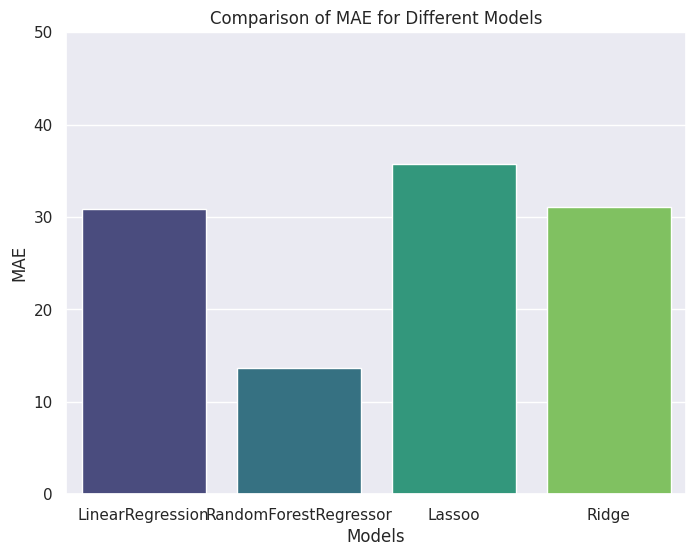

In [25]:
Model_Names=['LinearRegression','RandomForestRegressor','Lassoo','Ridge']
MAE = [30.881371919157107,13.706477777777778,35.769656788815944,31.12363658203252]
data = {'Model':Model_Names,'MAE':MAE}
df2 = pd.DataFrame(data)
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MAE', data=df2, palette='viridis')
plt.ylim([0,50])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Models')
plt.show()

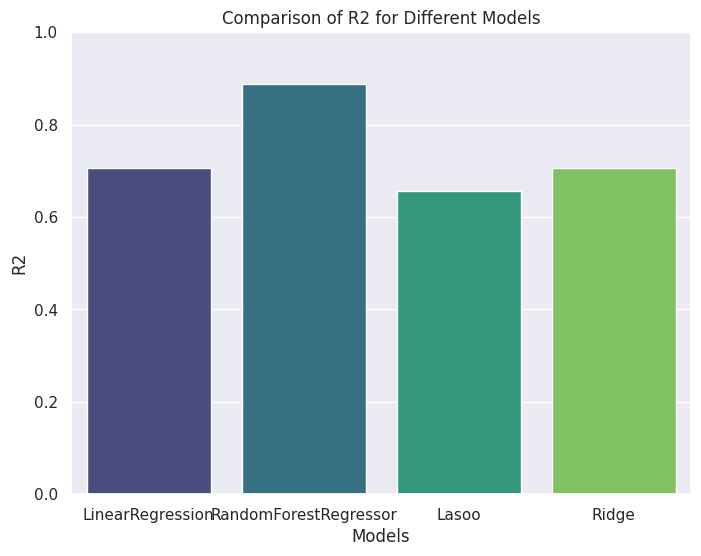

In [24]:
R2 = [0.7059672935012262,0.8878020700222183,0.6569408666171535,0.7058518854436946]
data = {'Model':Model_Names,'R2':R2}
df3 = pd.DataFrame(data)
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R2', data=df3, palette='viridis')
plt.ylim([0, +1])
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Comparison of R2 for Different Models')
plt.show()